# Prevendo evasão (churning) usando scikit-learn  

Olá a todos novamente.

  Hoje vou tentar fazer uma introdução a biblioteca [scikit-learn](http://scikit-learn.org/stable/) de Python. Se você procurar no Google "machine learning library" imagino que esse vai ser o primeiro resultado. E não é atôa, o scikit é fácil de usar, extramente completo e com muito material na internet.
  
  Para exemplificar os principais pontos da biblioteca vamos fazer uma análise de evasão (churning). 
  
  Mas "Senhor Mendes", o que é churning?
  
  ![Senta que lá vem história](http://stream1.gifsoup.com/view7/2597592/senta-que-la-vem-a-historia-o.gif "Senta que lá vem história")
  <p style="text-align: center;"> ( Me desculpe se você não pegou essa referência, provavelmente você é novo demais ou velho demais ) </p>

## Churning

A palavra *churning* em inglês possui vários significados:
 - Agitar leite em uma máquina para produzir manteiga
 - Mover algo com muita força
 
Mas a definição que queremos hoje é a de **evasão**, no caso, evasão de clientes. É bem simples: uma empresa tem (normalmente) muitos clientes, por algum motivo, alguns desses clientes querem abandonar a empresa/produto. Esses clientes estão evadindo, e isso normalmente gera uma diminuição no lucro da empresa e ninguém gosta de perder dinheiro não é mesmo?

 
O objetivo de uma análise de evasão é tentar entender os motivos dessa saída do cliente, falamos um pouco sobre isso no post sobre [Análise de Sobrevivência](http://developers.hekima.com/statiscs/studies/2016/05/09/survival-analysis/).

No post de hoje vamos tentar **prever** quais clientes vão abandonar a empresa/produto, sabendo disso a empresa poderia entrar em contato com cliente oferecendo um novo plano ou um [BB-8 de controle remoto.](http://store.sphero.com/products/bb-8-by-sphero) (quem não quer um BB-8 de controle remoto?)

## Hora de programar

![Programandog](http://i.myniceprofile.com/1408/140865.gif "Programandog")

**Dados**: Vamos utilizar uma base de dados de churning comum na internet, você pode baixar o csv [AQUI](https://s3.amazonaws.com/zahpee-public/churn.csv).

Novamente, estou utilizando o [Jupyter Notebook](https://ipython.org/notebook.html) (antigo IPython Notebook) para escrever o post e fazer toda programação, você pode baixar o arquivo [AQUI](https://s3.amazonaws.com/zahpee-public/churn.ipynb) e rodar em seu computador.

In [1]:
from __future__ import division
import pandas as pd
import numpy as np

# Primeiro, vamos ler o csv usando a biblioteca pandas.
df_churn = pd.read_csv('churn.csv')

# Agora vamos ver como se parecem esses dados.
print 'Amostra dos dados'
df_churn.head()     

Amostra dos dados


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


![pandas](http://orig13.deviantart.net/2884/f/2012/266/1/7/free_panda_icon__2__by_makorralover827-d5fma94.gif)

Utilizamos no código acima a biblioteca [pandas](http://pandas.pydata.org/), lemos o csv e passamos para um dataframe.

## Pré-processamento dos dados

Antes de trabalhar com essa matriz, vamos limpar um pouco os dados que parecem ter o mesmo significado ou que não vale a pena usar.

Os campos de "Phone" e "Area Code" podem ser removidos da matriz.

In [2]:
df_churn.drop(['Area Code','Phone'], axis=1, inplace=True)

Agora vamos separar a resposta em um vetor, além disso, vamos transformar o "True" para 1 e o "False" para 0.

Depois disso vamos remover a resposta do dataframe com os dados e visualizar o vetor de resposta e a tabela resultante.


In [3]:
# adiciona uma nova coluna chamada "Churn" com valores booleanos
df_churn['Churn'] = df_churn['Churn?'] == 'True.'

# Vamos criar um vetor de resposta y trasnformando os booleanos em 0 e 1
y = df_churn['Churn'].as_matrix().astype(np.int)

# agora vamos remover as colunas Churn e Churn? de nosso dataframe
df_churn.drop(['Churn','Churn?'], axis=1, inplace=True)

# Vamos ver como estão nosso dados
print str(y) # deve ser composto de 0s e 1s
df_churn.head()

[0 0 0 ..., 0 0 0]


,State,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Ainda temos algumas colunas que são *labels* e algumas que são *booleans*. Vamos repetir o processo do campo "Churn" para "Int'l Plan" e "VMail Plan" e transformar "yes" em 1 e no em 0.

In [4]:
yes_or_no = ["Int'l Plan","VMail Plan"]
df_churn[yes_or_no] = df_churn[yes_or_no] == 'yes'
df_churn[yes_or_no] = df_churn[yes_or_no].astype(np.int) 
df_churn.head()

,State,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Agora, vamos lidar com o campo "State", ele possui valores em formato de string, vamos transformar em números. Para isso podemos usar o [LabelEnconder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) da biblioteca sklearn.

In [5]:
from sklearn import preprocessing

# primeiro vamos criar um label encoder
le_state = preprocessing.LabelEncoder()

#agora vamos passar a coluna State
le_state.fit(df_churn['State'])

print 'Labels'
print str(list(le_state.classes_))

df_churn['State'] = le_state.transform(df_churn['State'])

#podemos também sair do valor numerico e chegar na label
print '\nNúmero para label'
print(list(le_state.inverse_transform([16, 35, 31])))

df_churn.head()

Labels
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

Número para label
['KS', 'OH', 'NJ']


,State,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Vamos então dar uma olhada como os valores dessa tabela se comportam? 

Primeiro, vamos ver a média, mediana, variância e o desvio padrão de alguns campos.

In [6]:
# Primeiro vamos pegar os nomes das colunas
col_names = ['Account Length','Day Mins','Day Calls','Day Charge','Intl Calls', 'CustServ Calls']

# Agora vamos mostrar a média
for name in col_names:
    print name
    print 'Média:' + str(df_churn[name].mean())
    print 'Mediana:' + str(df_churn[name].median())
    print 'Variância:' + str(df_churn[name].var())
    print 'Desvio Padrão:' + str(df_churn[name].std())
    print '\n'

Account Length
Média:101.064806481
Mediana:101.0
Variância:1585.80012059
Desvio Padrão:39.8221059286


Day Mins
Média:179.77509751
Mediana:179.4
Variância:2966.69648652
Desvio Padrão:54.4673892024


Day Calls
Média:100.435643564
Mediana:101.0
Variância:402.76814092
Desvio Padrão:20.0690842073


Day Charge
Média:30.5623072307
Mediana:30.5
Variância:85.7371282585
Desvio Padrão:9.25943455393


Intl Calls
Média:4.47944794479
Mediana:4.0
Variância:6.05757568554
Desvio Padrão:2.46121427055


CustServ Calls
Média:1.56285628563
Mediana:1.0
Variância:1.73051668912
Desvio Padrão:1.31549104487




E vamos analisar um pouco as entradas booleanas.


In [7]:
bool_fields = ['Int\'l Plan','VMail Plan']

# Agora vamos mostrar a somatoria
print 'Total de usuários: ' + str(len(df_churn['VMail Plan']))
print '\n'
for name in bool_fields:
    print name
    print 'Soma: ' + str(df_churn[name].sum())
    print 'Percentual: ' + str(df_churn[name].sum()/len(df_churn[name]))
    print '\n'

Total de usuários: 3333


Int'l Plan
Soma: 323
Percentual: 0.0969096909691


VMail Plan
Soma: 922
Percentual: 0.276627662766




Vamos olhar outro dado importante.

Quantos casos de churning temos nesses 3333 usuários.

In [8]:
print('Número total de usuários: {}'.format(y.shape[0]))
print('Quantidade de churn: {}'.format(y.sum()))
print('Percentual de churn: {}'.format(y.sum()/y.shape[0]))

Número total de usuários: 3333
Quantidade de churn: 483
Percentual de churn: 0.144914491449


Temos então 14.4% de casos de churning dentro dos nossos 3333 usuários observados.

O próximo passo para "melhorar" nossa entrada é dimensionar os valores das entradas para que todos fiquem entrem mais próximos, dado que alguns valores estão de 1 a 5 e outros podem variar de 100 a 1000. Para isso utilizaremos o [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

print 'X antes de dimensionar\n'
print str(df_churn.head())

X = scaler.fit_transform(df_churn)

print '\nValores depois do StandardScaler\n'
print str(X)

X antes de dimensionar

   State  Account Length  Int'l Plan  VMail Plan  VMail Message  Day Mins  \
0     16             128           0           1             25     265.1   
1     35             107           0           1             26     161.6   
2     31             137           0           0              0     243.4   
3     35              84           1           0              0     299.4   
4     36              75           1           0              0     166.7   

   Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  \
0        110       45.07     197.4         99       16.78       244.7   
1        123       27.47     195.5        103       16.62       254.4   
2        114       41.38     121.2        110       10.30       162.6   
3         71       50.90      61.9         88        5.26       196.9   
4        113       28.34     148.3        122       12.61       186.9   

   Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0     

## Avaliando o modelo (Matriz de Confusão e métricas de sucesso)

Agora vamos definir nossa função para avaliar o modelo, faremos um [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)), nesse caso vou utilizar o [StratifiedKFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedKFold.html) já que existe um desbalanceamento de classes.

O StratifiedKFold mantém esse percentual de cada classe nos folds gerados, impedindo que tenhamos pouquíssimos ou nenhum caso de evasão em algum dos folds.

Além disso, vamos criar uma função que desenha a [Matriz de Confusão](https://en.wikipedia.org/wiki/Confusion_matrix).

In [10]:
from sklearn import cross_validation

# função que realiza a divisão de folds e retorna o y previsto
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle, random_state=12)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [11]:
import pylab as pl
import matplotlib.pyplot as plt

%matplotlib inline

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

Acurácia do modelo: 0.940894089409
F1 do modelo: 0.760048721072

Matriz de confusão
[[2824   26]
 [ 171  312]]

Matriz de confusão normalizada
[[ 0.99087719  0.00912281]
 [ 0.35403727  0.64596273]]

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


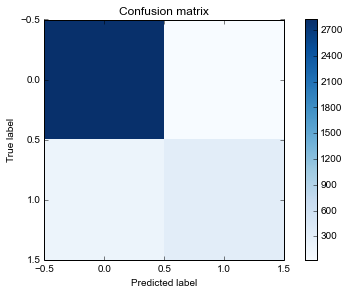

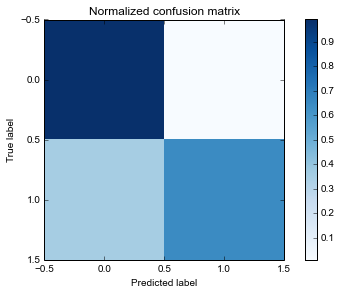

In [13]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def test_classifier(X,y,print_cm,classifier,**kwargs):
    # testando com Random Forest
    y_pred = stratified_cv(X, y, classifier,**kwargs)

    # Acurácia
    print 'Acurácia do modelo: ' + str(accuracy_score(y,y_pred))
    print 'F1 do modelo: ' + str(f1_score(y,y_pred))

    if print_cm:
        # adicionando resultado na matriz de confusão
        cm = confusion_matrix(y, y_pred)
        print '\nMatriz de confusão'
        print str(cm)
        plot_confusion_matrix(cm)

        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('\nMatriz de confusão normalizada')
        plt.figure()
        plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
        print(cm_normalized)
    


test_classifier(X,y,True,RF,random_state=12)

Primeiramente, preciso dizer que estamos utilizando o algoritmo [Random Forests](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) que utiliza várias árvores de decisão para fazer a classificação, passamos para ele a matriz X com as features e o vetor y de respostas.

![Groot](https://secure.static.tumblr.com/729f45dd53c30c72448ad2bd92e478d1/aw8lxok/8lLnac19x/tumblr_static_tumblr_static_5qu2x629tns4owww4osoco004_640.gif)


Como estamos lidando aqui o problema como uma classificação binária, então temos que escolher uma métrica de sucesso condizente. No caso, vamos mostrar tanto a acurácia, que é simples de entender e explicar quanto a métrica [f1](https://en.wikipedia.org/wiki/F1_score) que mostra melhor o sucesso do modelo, dado que existe um grande desbalanceamento de classes.

Utilizamos também a matriz de confusão normalizada para ficar mais fácil visualizar o quão bem modelo preve o churning.

Agora vamos listar a importância das features. 

Fonte: [Feature importances with forests of trees](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) 

## Importância de Features

In [14]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


def feature_importance(X,y):
    # Build a forest and compute the feature importances
    forest = RandomForestClassifier(random_state=12)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

0 - State
1 - Account Length
2 - Int'l Plan
3 - VMail Plan
4 - VMail Message
5 - Day Mins
6 - Day Calls
7 - Day Charge
8 - Eve Mins
9 - Eve Calls
10 - Eve Charge
11 - Night Mins
12 - Night Calls
13 - Night Charge
14 - Intl Mins
15 - Intl Calls
16 - Intl Charge
17 - CustServ Calls


Feature ranking:
1. feature 5 (0.150194)
2. feature 17 (0.122422)
3. feature 7 (0.121427)
4. feature 8 (0.078148)
5. feature 2 (0.074473)
6. feature 10 (0.070833)
7. feature 14 (0.045192)
8. feature 15 (0.042706)
9. feature 11 (0.038932)
10. feature 16 (0.037543)
11. feature 12 (0.035036)
12. feature 13 (0.034994)
13. feature 6 (0.031734)
14. feature 1 (0.028708)
15. feature 9 (0.024622)
16. feature 3 (0.022160)
17. feature 0 (0.020662)
18. feature 4 (0.020216)


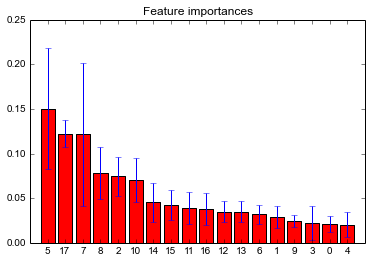

In [15]:
i = 0
for feature in df_churn.columns.tolist():
    print str(i) + ' - ' +feature
    i += 1    

print '\n'    

feature_importance(X,y)

Podemos ver por esses dados que as features mais importantes são:
    * Day Charge
    * Day Mins
    * Customer Service Calls
Isso faz sentido, um usuário que utiliza pouco e/ou faz muitas ligações para o SAC tem uma chance maior de cancelar seu plano.        

Vamos agora variar alguns hyper-parâmetros do classificador?

Vamos utilizar aqui o [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html), ele passa por todas combinações passadas e escolher a melhor baseada na métrica desejada.

In [16]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

def gridSearch(X,y,classifier, tuned_parameters):
    scores = ['f1', 'accuracy']
    
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

    for score in scores:
        print("# Otimização hyper-parametros para %s" % score)
        
        clf = GridSearchCV(classifier, tuned_parameters, cv=5,
                           scoring=score)
        clf.fit(X_train, y_train)

        print("Melhores parâmetros encontrados no conjunto de treino:")
        print
        print(clf.best_params_)
        print
        print("Resultado do grid:")
        print
        for params, mean_score, scores in clf.grid_scores_:
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean_score, scores.std() * 2, params))
        print

        print("Detalhamento:")
        print
        print("O modelo é treinado com o conjunto de treino")
        print("Os resultados finais são do conjunto de teste")
        print
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print

        
tuned_parameters = [{'n_estimators': [10,100,250],'max_features':['auto','sqrt','log2', None]}]

# Buckle up, this may take a while
gridSearch(X,y,RandomForestClassifier(random_state=12),tuned_parameters) 

# Otimização hyper-parametros para f1
Melhores parâmetros encontrados no conjunto de treino:

{'max_features': 'auto', 'n_estimators': 250}

Resultado do grid:

0.687 (+/-0.081) for {'max_features': 'auto', 'n_estimators': 10}
0.806 (+/-0.062) for {'max_features': 'auto', 'n_estimators': 100}
0.815 (+/-0.054) for {'max_features': 'auto', 'n_estimators': 250}
0.687 (+/-0.081) for {'max_features': 'sqrt', 'n_estimators': 10}
0.806 (+/-0.062) for {'max_features': 'sqrt', 'n_estimators': 100}
0.815 (+/-0.054) for {'max_features': 'sqrt', 'n_estimators': 250}
0.687 (+/-0.081) for {'max_features': 'log2', 'n_estimators': 10}
0.806 (+/-0.062) for {'max_features': 'log2', 'n_estimators': 100}
0.815 (+/-0.054) for {'max_features': 'log2', 'n_estimators': 250}
0.751 (+/-0.109) for {'max_features': None, 'n_estimators': 10}
0.787 (+/-0.068) for {'max_features': None, 'n_estimators': 100}
0.793 (+/-0.069) for {'max_features': None, 'n_estimators': 250}

Detalhamento:

O modelo é treinado com o con

Lembrando que o GridSearchCV utilizado aqui pode demorar muito dependendo do número de hyper-paramêtros, dado que ele vai testar todas as combinações possíveis. Existem outras maneiras de variar esses hyper-parêmetros, para aprender mais sobre isso visite a página relativa a [GridSearch](http://scikit-learn.org/stable/modules/grid_search.html).

Podemos ver depois de todos esses testes que o melhor resultado encontrado foi com os seguintes parâmetros do classificador:

**F1 -
{'max_features': 'auto', 'n_estimators': 250}**

**Acurácia
{'max_features': 'auto', 'n_estimators': 250}**

Vamos agora verificar como fica nossa matriz de confusão com esses parâmetros?

In [17]:
test_classifier(X,y,False,RandomForestClassifier,max_features='auto', n_estimators= 250,random_state=12)

Acurácia do modelo: 0.954695469547
F1 do modelo: 0.825433526012


Podemos ver que houve uma pequena melhora dos resultados variando os hyper-parâmetros.

__Antigos:__

Acurácia do modelo: 0.940894089409

F1 do modelo: 0.760048721072

__Novos:__

Acurácia do modelo: 0.954695469547

F1 do modelo: 0.825433526012


![Comemorando](http://img.ibxk.com.br/2016/04/11/11175523319429.gif)
  <p style="text-align: center;"> *Podemos comemorar =D *</p>


Para finalizar nosso exemplo, vamos tentar gerar mais features? 

Vamos utilizar [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures), com ele conseguimos gerar mais colunas em nossa tabela X, gerando features baseados nos dados existentes.

No caso, se você possui duas features [a,b] essa operação irá gerar [1, a, b, a^2, ab, b^2], isto é, vai combinar as features com elas mesmas e com as outras.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

print 'Número de features: ' + str(X.shape[1])
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
print '\nNúmero de features depois da transformação: ' + str(X_poly.shape[1])

Número de features: 18

Número de features depois da transformação: 190


Saímos de 18 features para 190!!

Outra opção é não gerar as features que são combinação delas mesmas, passando o parâmetro **interaction_only** como true. Dessa forma apenas as combinações de features irão ser geradas. 

Exemplo: [1,a,b,ab]

In [19]:
poly_less = PolynomialFeatures(interaction_only=True)
X_poly_less = poly_less.fit_transform(X)

print '\nNúmero de features com interaction_only: ' + str(X_poly_less.shape[1])


Número de features com interaction_only: 172


Vamos testar nosso classificador agora com 190 features.

In [20]:
test_classifier(X_poly,y,False,RandomForestClassifier,max_features='auto', n_estimators= 250, n_jobs=-1, random_state=12)

Acurácia do modelo: 0.952895289529
F1 do modelo: 0.818497109827


**Uai** (sim sou mineiro), temos mais features e o valor da acurácia piorou? 

Provavelmente isso aconteceu, pois fizemos o GridSearch para as 18 features iniciais ou o as novas entradas adicionam ruído.

Vamos testar agora um GridSearch nesse hiper-parâmetro para nossas 190 features.

In [21]:
tuned_parameters = [{'max_features':['auto','sqrt','log2', None]}]

# Buckle up, this REALLY may take a while
gridSearch(X_poly,y,RandomForestClassifier(n_estimators= 250, n_jobs=-1),tuned_parameters) 

# Otimização hyper-parametros para f1
Melhores parâmetros encontrados no conjunto de treino:

{'max_features': None}

Resultado do grid:

0.798 (+/-0.063) for {'max_features': 'auto'}
0.783 (+/-0.045) for {'max_features': 'sqrt'}
0.693 (+/-0.094) for {'max_features': 'log2'}
0.803 (+/-0.064) for {'max_features': None}

Detalhamento:

O modelo é treinado com o conjunto de treino
Os resultados finais são do conjunto de teste

             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1422
          1       0.84      0.75      0.79       245

avg / total       0.94      0.94      0.94      1667


# Otimização hyper-parametros para accuracy
Melhores parâmetros encontrados no conjunto de treino:

{'max_features': 'sqrt'}

Resultado do grid:

0.947 (+/-0.016) for {'max_features': 'auto'}
0.950 (+/-0.016) for {'max_features': 'sqrt'}
0.928 (+/-0.012) for {'max_features': 'log2'}
0.950 (+/-0.013) for {'max_features': None}

Detalhamento:

O modelo é t

In [22]:
test_classifier(X_poly,y,False,RandomForestClassifier,max_features='sqrt', n_estimators= 250, n_jobs=-1, random_state=12)

Acurácia do modelo: 0.952895289529
F1 do modelo: 0.818497109827


Demorou MUITO para rodar e mesmo assim não melhoramos o resultado. Talvez alguma dessas 172 features seja interessante, mas parece que o "ruído" que elas geram não melhora o resultado. 

## Conclusão

Nesse post passamos por praticamente todas etapas de um projeto de Ciência de Dados, limpamos, pre-processamos e criamos novos dados. Além disso, fizemos um gridsearch para achar os melhores hiper-parâmetros e verificamos os resultados vendo as métricas (acurácia e f1) alem de verificar a matriz de confusão gerada.

Logicamente, em um projeto real de churning existem outras complicações. Normalmente, os dados são por tempo, esse CSV seria apenas os dados relativos a um mês, além disso, em projetos de evasão temos que levar em conta o negócio para encontrar as melhores métricas de sucesso e o melhor algoritmo. Pode ser que você tenha que retornar uma lista de tamanho definido com os clientes com maior probabilidade de sáida, mas com o ferramental apresentado nesse post é possível atacar esses problemas.

Espero que o post tenha sido interessante e ajude vocês a usarem o Scikit.

Abraços e até a próxima.

![The End](https://media.giphy.com/media/nU704Y2jeFOHm/giphy.gif)

